In [1]:
import warnings as _wrn
_wrn.filterwarnings('always')

In [2]:
import sys as _sys
import itertools as _itr

import numpy as _nmp
import numpy.random as _rnd
import matplotlib.pyplot as _plt
import pandas as _pnd

%load_ext autoreload
%autoreload 2
%matplotlib inline

_plt.style.use('ggplot')

In [3]:
import eQTLseq as _assoc

In [80]:
# ... load real data

data = {
    'G': _pnd.read_table('/Users/dimitris/WTCHG/Workstation/Data/Geuvadis/VCF/genotypes.TF.common.HIGH.txt', index_col=0, header=None),
    'Z': _pnd.read_table('/Users/dimitris/WTCHG/Workstation/Data/Geuvadis/counts/counts_miRNAs.txt', index_col=0)
    # COUNTS = (_pnd.read_table('/home/dimitris/Data/Geuvadis/counts/counts_genes.txt', index_col=[0,1,2])
    #           .xs('protein_coding', level='BIOTYPE', drop_level=False))    
}

samples = data['G'].index & data['Z'].columns

data['Z'] = data['Z'][samples].values
data['G'] = data['G'].loc[samples].values

(452, 21) (2226, 452)


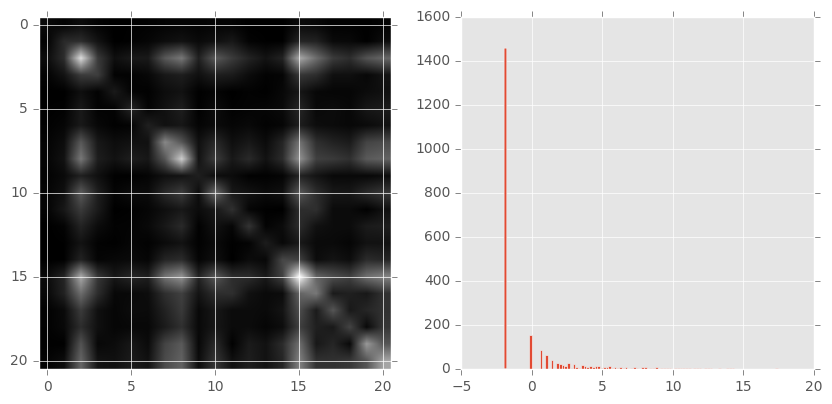

In [138]:
# prepare data

Z = data['Z']
G = data['G']

Z = Z[Z.sum(1) > 0, :]       # keep only expressed tags
# Z = Z[Z.sum(1) > _nmp.percentile(Z.sum(1), 60), :]
G = G[:, _nmp.std(G, 0) > 0] # keep only non-monomorphic loci

Z = Z / _assoc.calculate_norm_factors(Z)
Z = _assoc.transform_data(Z, kind='voom')

print(G.shape, Z.shape)

# take a quick look at the data

_plt.figure(figsize=(10,10));
_plt.subplot(2,2,1); _plt.imshow(G.T.dot(G), cmap=_plt.cm.Greys_r);
_plt.subplot(2,2,2); _plt.hist(Z[:, 0], bins=100);

In [140]:
_rnd.seed(0)
res = _assoc.run(Z.T[:200,:], G[:200,:], n_iters = 4000, model='Normal', scale=True, n_threads=4)

100%|██████████| 4000/4000 [00:20<00:00, 195.59it/s]


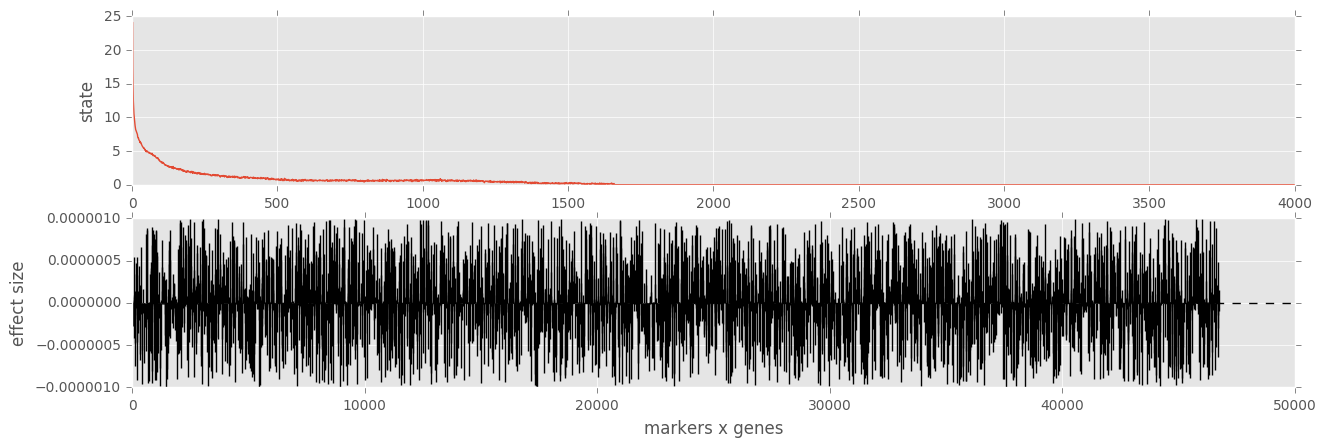

In [141]:
_plt.figure(figsize = (15,10));

_plt.subplot(4,1,1); _plt.plot(res['state']); _plt.xlabel('iteration'); _plt.ylabel('state')

_plt.subplot(4,1,2); _plt.vlines(range(res['beta'].size), 0, res['beta'].ravel()); _plt.xlabel('markers x genes'); _plt.ylabel('effect size')
_plt.axhline(linestyle='--', color='k');

In [143]:
_nmp.transpose((_nmp.abs(res['beta']) > 1e-6).nonzero())

array([], shape=(0, 2), dtype=int64)

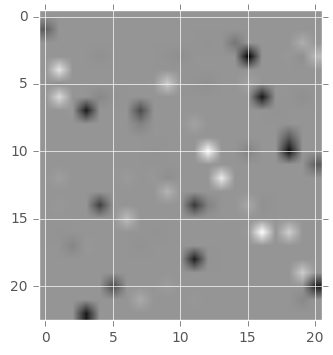

In [77]:
_plt.imshow(res['beta'][::100, :], cmap=_plt.cm.gray)

In [107]:
res_negbinomial = res

In [124]:
import pickle as _pkl

In [135]:
f = 'res.TF.common.HIGH.452.NBinomial.none'
out = res_negbinomial
with open('/Users/dimitris/WTCHG/Cluster/Projects/eQTLseq/results/geuvadis/ROC/{}.pkl'.format(f), 'wb') as fh:
    _pkl.dump(out, fh)

In [137]:
res['beta'].shape

(2226, 21)